In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gerar dados fictícios de habilidade dos jogadores (valores entre 0 e 100)
np.random.seed(42)  # Define a semente aleatória para reprodução dos resultados
habilidades = np.random.randint(0, 101, size=15)

In [3]:
# Definir os intervalos de pontuação e seus rótulos
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
rotulos = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']


In [4]:
# Criar a distribuição de frequência utilizando pd.cut
distribuicao = pd.cut(habilidades, bins=intervalos, labels=rotulos, right=False)


In [12]:
# Calcular a contagem de frequência para cada intervalo
frequencia = pd.value_counts(distribuicao, sort=True)
frequencia

/tmp/ipykernel_3114/1651250564.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(distribuicao, sort=True)


20-29     3
70-79     3
80-89     3
90-100    2
0-9       1
10-19     1
50-59     1
60-69     1
30-39     0
40-49     0
Name: count, dtype: int64

In [11]:
# Calcular a frequência relativa
frequencia_relativa = frequencia / len(habilidades)
frequencia_relativa


20-29     0.200000
70-79     0.200000
80-89     0.200000
90-100    0.133333
0-9       0.066667
10-19     0.066667
50-59     0.066667
60-69     0.066667
30-39     0.000000
40-49     0.000000
Name: count, dtype: float64

In [10]:
# Calcular a frequência acumulada
frequencia_acumulada = frequencia.cumsum()
frequencia_acumulada

20-29      3
70-79      6
80-89      9
90-100    11
0-9       12
10-19     13
50-59     14
60-69     15
30-39     15
40-49     15
Name: count, dtype: int64

In [13]:
frequencia_relativa_acumulada = frequencia_relativa.cumsum()
frequencia_relativa_acumulada

20-29     0.200000
70-79     0.400000
80-89     0.600000
90-100    0.733333
0-9       0.800000
10-19     0.866667
50-59     0.933333
60-69     1.000000
30-39     1.000000
40-49     1.000000
Name: count, dtype: float64

In [14]:
# Criar o DataFrame com os intervalos e suas frequências
distribuicao_df = pd.DataFrame({
    'Intervalo de Pontuação': frequencia.index,
    'Frequência': frequencia.values,
    'Frequência Relativa': frequencia_relativa.values,
    'Frequência Acumulada': frequencia_acumulada.values,
    'Frequência Relativa Acumulada': frequencia_relativa_acumulada.values
})
distribuicao_df

,Intervalo de Pontuação,Frequência,Frequência Relativa,Frequência Acumulada,Frequência Relativa Acumulada
0,20-29,3,0.200000,3,0.200000
1,70-79,3,0.200000,6,0.400000
2,80-89,3,0.200000,9,0.600000
3,90-100,2,0.133333,11,0.733333
4,0-9,1,0.066667,12,0.800000
5,10-19,1,0.066667,13,0.866667
6,50-59,1,0.066667,14,0.933333
7,60-69,1,0.066667,15,1.000000
8,30-39,0,0.000000,15,1.000000
9,40-49,0,0.000000,15,1.000000


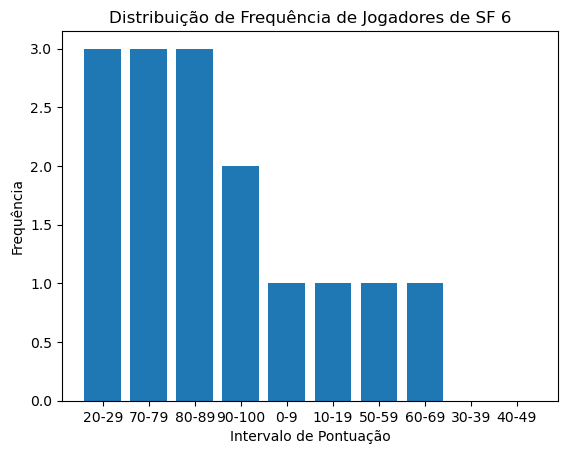

In [16]:
plt.bar(distribuicao_df['Intervalo de Pontuação'], distribuicao_df['Frequência'])
plt.xlabel('Intervalo de Pontuação')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência de Jogadores de SF 6')
plt.show()